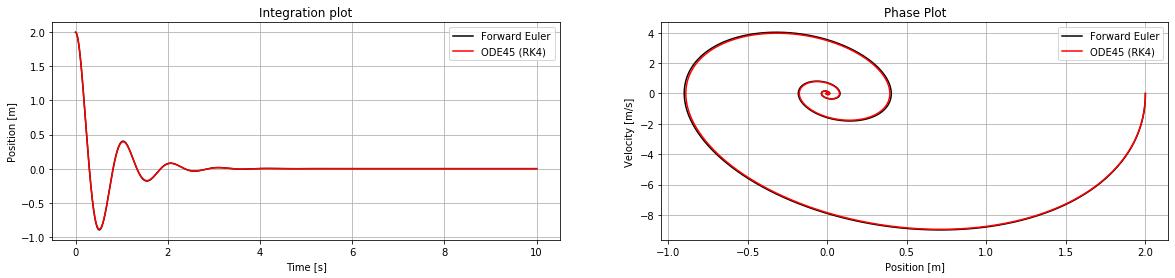

In [13]:
# https://www.youtube.com/watch?v=r1eWerqrcqo&list=PLMrJAkhIeNNTYaOnVI3QpH7jgULnAmvPA&index=9

import numpy as np 
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

# model definition
w = 2 *np.pi   # natural frequence
d = .25        # damping factor 
A = np.array([[0,1], [-w**2, -2*d*w]]) # \dot{x} = Ax
x0 = [2, 0]     # condition at t=0, x0, v0 

# integration parameters
dt = 0.001 # time step 
T = 10    # integration time
n = int(T/dt)
t = np.linspace(0, T, n)

# iterate forward euler 
xF = np.zeros((2,n))
xF[:,0] = x0
for k in range(n-1):
    xF[:, k+1] = (np.eye(2) + dt * A) @ xF[:, k]

# integrate using 4th order Runge Kutta
def linear_ode(t, x):
    return A @ x

linear_ode_solution = solve_ivp(linear_ode, (0, T), x0, t_eval=t)
xGood = linear_ode_solution.y

plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.plot(t, xF[0, :], 'k')
plt.plot(t, xGood[0, :], 'r')
plt.xlabel('Time [s]')
plt.ylabel('Position [m]')
plt.legend(['Forward Euler', 'ODE45 (RK4)'])
plt.title('Integration plot')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(xF[0, :], xF[1, :], 'k')
plt.plot(xGood[0, :], xGood[1, :], 'r')
plt.xlabel('Position [m]')
plt.ylabel('Velocity [m/s]')
plt.legend(['Forward Euler', 'ODE45 (RK4)'])
plt.title('Phase Plot')
plt.grid(True)